In [1]:
import numpy as np
import os
import ast
from tqdm import tqdm
from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

import pickle

In [2]:
working_dir = os.getcwd()
parent_dir = os.path.dirname(working_dir)
data_dir = os.path.join(parent_dir, 'data')


data_hamiltonians_file = os.path.join(data_dir, 'hamiltonians.txt')


fullH_dir = os.path.join(data_dir, 'fullHamiltonians')
fullH_sub_JW_dir = os.path.join(fullH_dir, 'JW')


In [3]:
# Tapered Hamiltonians
with open(data_hamiltonians_file, 'r') as input_file:
    tapered_hamiltonians = ast.literal_eval(input_file.read())
    
tapered_H_size_qubits = {
                            mol_key: {'n_qubits': tapered_hamiltonians[mol_key][1],
                                      'n_terms': len(tapered_hamiltonians[mol_key][2])}
                            for mol_key in tapered_hamiltonians if mol_key=='H2-O1_STO-3G_singlet'}
del tapered_hamiltonians

In [4]:
for key in tapered_H_size_qubits.keys():
    print(f"{key: <30}     No. terms:  {tapered_H_size_qubits[key]['n_terms']:<7.0f}  No.qubits:  {tapered_H_size_qubits[key]['n_qubits']:<5.0f}")


H2-O1_STO-3G_singlet               No. terms:  1035     No.qubits:  10   


In [5]:
# Pre tapered Hamiltonians
data_pretap_hamiltonians_file = os.path.join(data_dir, 'Hamiltonians_pre_tapering.txt')
with open(data_pretap_hamiltonians_file, 'r') as input_file:
    NON_tapered_hamiltonians = ast.literal_eval(input_file.read())

NON_tapered_H_size_qubits = {
                            mol_key: {'n_qubits': len(list(NON_tapered_hamiltonians[mol_key].keys())[0]),
                                      'n_terms': len(NON_tapered_hamiltonians[mol_key])}
                            for mol_key in NON_tapered_hamiltonians }
del NON_tapered_hamiltonians

In [6]:
# molecule names in hamiltonians and hamiltonians before tapering are different
# requires using regular expressions to select correct terms
# done below (code replaces pre-tapered hamiltonian names with naming done by Will!)

import re
pre_tap_hamiltonians_relevent={}
for mol_name_PreT in NON_tapered_H_size_qubits:
    for mol_name in tapered_H_size_qubits.keys():
        if (bool(re.match(f'^{mol_name}.*$', mol_name_PreT)) and mol_name=='H2-O1_STO-3G_singlet'): # NO wildcard at front. Wildcard at end
            pre_tap_hamiltonians_relevent[mol_name] = NON_tapered_H_size_qubits[mol_name_PreT]

In [7]:
pre_tap_hamiltonians_relevent

{'H2-O1_STO-3G_singlet': {'n_qubits': 14, 'n_terms': 1086}}

In [8]:
sorted(list(pre_tap_hamiltonians_relevent.keys())) == sorted(list(tapered_H_size_qubits.keys()))

True

In [9]:
for key in tapered_H_size_qubits.keys():
    print(f"{key: <25}     No. terms original:  {pre_tap_hamiltonians_relevent[key]['n_terms']:<6.0f}   No. terms tapering:  {tapered_H_size_qubits[key]['n_terms']:<5.0f}")

H2-O1_STO-3G_singlet          No. terms original:  1086     No. terms tapering:  1035 


# Import Myriad Results

In [10]:
## import LCU results
results_dir = os.path.join(working_dir, 'SeqRot_LCU_script_A_results')

myriad_CS_VQE_LCU_results = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('LCU_CS_VQE_exp')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[40:-8]
        if mol_name=='H2-O1_STO-3G_singlet':
            with open(file_path,'rb') as infile:
                data = pickle.load(infile)

            myriad_CS_VQE_LCU_results[mol_name] = data

In [11]:
## import SeqRot results
results_dir = os.path.join(working_dir, 'SeqRot_LCU_script_A_results')

myriad_CS_VQE_SeqRot_results = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('SeqRot_CS_VQE_exp')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[43:-8]
        if mol_name=='H2-O1_STO-3G_singlet':
            with open(file_path,'rb') as infile:
                data = pickle.load(infile)
            myriad_CS_VQE_SeqRot_results[mol_name] = data

In [12]:
sorted(list(myriad_CS_VQE_SeqRot_results.keys())) == sorted(list(myriad_CS_VQE_LCU_results.keys()))

True

In [13]:
myriad_CS_VQE_SeqRot_results['H2-O1_STO-3G_singlet'][1]

{'E': -83.87422390061542,
 'H': {'I': -83.5903032975458,
  'X': 7.170904689490776e-09,
  'Z': 0.28392060306961203}}

# Perform Unitary Partitioning on results

In [14]:
from quchem.Unitary_Partitioning.Graph import Clique_cover_Hamiltonian
import quchem.Misc_functions.conversion_scripts as conv_scr 
from copy import deepcopy

In [15]:
# ### find anti-commuting sets
# unitary_paritioning_LCU={}
# unitary_paritioning_SeqRot={}

# commutativity_flag = 'AC' ## <- defines relationship between sets!!!
# plot_graph = False
# Graph_colouring_strategy='largest_first'


# for mol_key in tqdm(list(myriad_CS_VQE_LCU_results.keys())):
    
#     exp_LCU_result = myriad_CS_VQE_LCU_results[mol_key]
#     exp_SeqRot_result = myriad_CS_VQE_SeqRot_results[mol_key]
    
    
#     anti_commuting_sets_different_H_SeqRot_sizes={}
#     anti_commuting_sets_different_H_LCU_sizes={}
#     for ind_key in myriad_CS_VQE_SeqRot_results[mol_key]:
        
#         if isinstance(ind_key, str):
#             continue
        
#         if ind_key==0:
#             # only non-contextual problem
#             anti_commuting_sets_different_H_SeqRot_sizes[ind_key]={}
#             anti_commuting_sets_different_H_LCU_sizes[ind_key]={}
#         else:

#             ### LCU
#             H_LCU_dict = myriad_CS_VQE_LCU_results[mol_key][ind_key]['H']
#             H_LCU= conv_scr.Get_Openfermion_Hamiltonian(H_LCU_dict)

#             n_qubits = len(list(H_LCU_dict.keys())[0])
#             anti_commuting_sets_LCU = Clique_cover_Hamiltonian(list(H_LCU), 
#                                                          n_qubits, 
#                                                          commutativity_flag, 
#                                                          Graph_colouring_strategy)
            
#             anti_commuting_sets_different_H_LCU_sizes[ind_key]= anti_commuting_sets_LCU
            
#             ### SeqRot
#             H_SeqRot_dict = myriad_CS_VQE_SeqRot_results[mol_key][ind_key]['H']
            
#             # PRUNE
#             H_SeqRot_dict = {P_key: coeff.real for P_key, coeff in H_SeqRot_dict.items() if not np.isclose(coeff.real,0)}
            
#             H_SeqRot= conv_scr.Get_Openfermion_Hamiltonian(H_SeqRot_dict)
#             anti_commuting_sets_SeqRot = Clique_cover_Hamiltonian(H_SeqRot, 
#                                              n_qubits, 
#                                              commutativity_flag, 
#                                              Graph_colouring_strategy)

#             anti_commuting_sets_different_H_SeqRot_sizes[ind_key]= anti_commuting_sets_SeqRot
    
#     unitary_paritioning_LCU[mol_key]= deepcopy(anti_commuting_sets_different_H_LCU_sizes)
#     unitary_paritioning_SeqRot[mol_key]= deepcopy(anti_commuting_sets_different_H_SeqRot_sizes)
#     del anti_commuting_sets_different_H_LCU_sizes
#     del anti_commuting_sets_different_H_SeqRot_sizes

# Unitary Partitioning Results

In [16]:
## import LCU results
UP_results_dir = os.path.join(working_dir, 'UnitaryPartitioning_ontop_CSVQE_results')

myriad_UP_LCU_on_CSVQE_LCU = {}
for filename in os.listdir(UP_results_dir):
    if (filename.endswith('.pickle') and filename.startswith('Unitary_Partitinging_LCU_CS_VQE_LCU_exp')):
        file_path = os.path.join(UP_results_dir, filename) 
        mol_name = filename[65:-8]
        if mol_name=='H2-O1_STO-3G_singlet':
            with open(file_path,'rb') as infile:
                data = pickle.load(infile)

            myriad_UP_LCU_on_CSVQE_LCU[mol_name] = data

In [17]:
myriad_UP_SeqRot_on_CSVQE_SeqRot = {}
for filename in os.listdir(UP_results_dir):
    if (filename.endswith('.pickle') and filename.startswith('Unitary_Partitinging_SeqRot_CS_VQE_SeqRot_exp')):
        file_path = os.path.join(UP_results_dir, filename) 
        mol_name = filename[71:-8]
        if mol_name=='H2-O1_STO-3G_singlet':
            with open(file_path,'rb') as infile:
                data = pickle.load(infile)

            myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name] = data

In [18]:
myriad_UP_SeqRot_on_CSVQE_SeqRot['H2-O1_STO-3G_singlet']

{'H2-O1_STO-3G_singlet': {0: {'AC_sets': {}, 'E': -83.87422390061542},
  1: {'AC_sets': {0: [-83.5903032975458 []], 1: [0.28392060306961203 [Z0]]},
   'E': -83.87422390061542},
  2: {'AC_sets': {0: [-83.17446122858297 []],
    1: [-0.41584206896282155 [Z1], -0.05685939385156871 [X1]],
    2: [-0.0013805549974529457 [X0], 0.2809672326667499 [Z0]],
    3: [0.08600170960798992 [X0 X1], 0.0013805621683576595 [X0 Z1]],
    4: [-0.05685943176893268 [Z0 X1], 0.002953370402862171 [Z0 Z1]]},
   'E': -83.87959838666465},
  3: {'AC_sets': {0: [-82.62483871771943 []],
    1: [0.15608344531241486 [Z1 Z2],
     -0.028429701890196755 [X2],
     0.01545001100876814 [X1 Z2],
     0.012755431629593271 [Y0 Y1 Z2]],
    2: [0.028429691961371944 [Z1 X2],
     -0.2597586236504067 [Z2],
     0.007493741525714776 [X0 X1 X2],
     -0.017238832673645513 [Z0 X1 X2]],
    3: [-0.0006902774987264729 [X0],
     0.0825619881415175 [Z0],
     0.007493741525714776 [Y0 Y1 X2]],
    4: [0.0006902774987264798 [X0 Z1],
  

# Plot Results

In [19]:
def plot_n_terms_and_error(non_tapered_H_dict, tapered_H_dict, CS_VQE_LCU_dict, CS_VQE_SeqRot_dict,
                           UP_LCU_on_LCU_CSVQE_dict, UP_SeqRot_on_SeqRot_CSVQE_dict,
                           mol_name,  dpi=200):
    # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    # mol_dict = list of lists of anticommuting sets and standard contextual H
    # paper_results_dict =  CS-VQE paper results dict
    # Nterms_H_dict = dict of number of terms in each molecular hamiltonian without any method applied!
    
    ## get total number of terms for each reduction
    
    True_gs_energy = CS_VQE_LCU_dict[mol_name]['exp_conditions']['true_gs']
    
    
    # Get no. terms and energy error
    
    CS_VQE_SeqRot_terms = []
    CS_VQE_SeqRot_error=[]
    
    CS_VQE_LCU_terms = []
    CS_VQE_LCU_error =[]
    
    UP_SeqRot_ontop_CS_VQE_SeqRot_terms =[]
    UP_SeqRot_ontop_CS_VQE_SeqRot_error=[]
    
    UP_LCU_ontop_CS_VQE_LCU_terms =[]
    UP_LCU_ontop_CS_VQE_LCU_error=[]
    
    for ind in sorted(UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][mol_name].keys()):
        UP_SeqRot_terms = len(UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][mol_name][ind]['AC_sets'])
        UP_SeqRot_ontop_CS_VQE_SeqRot_terms.append(UP_SeqRot_terms)
        UP_SeqRot_E = UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][mol_name][ind]['E']
        UP_SeqRot_error = abs(True_gs_energy-UP_SeqRot_E)
        UP_SeqRot_ontop_CS_VQE_SeqRot_error.append(UP_SeqRot_error)
        
        UP_LCU_terms = len(UP_LCU_on_LCU_CSVQE_dict[mol_name][mol_name][ind]['AC_sets'])
        UP_LCU_ontop_CS_VQE_LCU_terms.append(UP_LCU_terms)
        UP_LCU_E = UP_LCU_on_LCU_CSVQE_dict[mol_name][mol_name][ind]['E']
        UP_LCU_error = abs(True_gs_energy-UP_LCU_E)
        UP_LCU_ontop_CS_VQE_LCU_error.append(UP_LCU_error)
        
        CSVQE_LCU_terms = len(CS_VQE_LCU_dict[mol_name][ind]['H'])
        CS_VQE_LCU_terms.append(CSVQE_LCU_terms)
        CSVQE_LCU_E = CS_VQE_LCU_dict[mol_name][ind]['E']
        CSVQE_LCU_error = abs(True_gs_energy-CSVQE_LCU_E)
        CS_VQE_LCU_error.append(CSVQE_LCU_error)
        
        CSVQE_SeqRot_terms = len(CS_VQE_SeqRot_dict[mol_name][ind]['H'])
        CS_VQE_SeqRot_terms.append(CSVQE_SeqRot_terms)
        CSVQE_SeqRot_E = CS_VQE_SeqRot_dict[mol_name][ind]['E']
        CSVQE_SeqRot_error = abs(True_gs_energy-CSVQE_SeqRot_E)
        CS_VQE_SeqRot_error.append(CSVQE_SeqRot_error)
    
    n_qubits = np.array([i for i in range(len(UP_LCU_ontop_CS_VQE_LCU_terms))]) # labels
    
    width = 0.2  # the width of the bars
    offset = 0.125 # offset on x axis
    
    fig, ax = plt.subplots(dpi=dpi)
    rects1 = ax.bar(n_qubits - (offset+width), CS_VQE_SeqRot_terms, width, label='CS_VQE_SeqRot',color="yellowgreen")
    rects2 = ax.bar(n_qubits - offset, CS_VQE_LCU_terms, width, label='CS_VQE_LCU',color="royalblue")
    rects3 = ax.bar(n_qubits + offset, UP_SeqRot_ontop_CS_VQE_SeqRot_terms, width, label='UP_SeqRot_ontop_CSVQE',color="crimson")
    rects4 = ax.bar(n_qubits + (offset+width), UP_LCU_ontop_CS_VQE_LCU_terms, width, label='UP_LCU_ontop_CSVQE',color="darkorchid")

    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of qubits')
    

    tapered_N_terms = tapered_H_dict[mol_name]['n_terms']
    tapered_N_qubits = tapered_H_dict[mol_name]['n_qubits']
    rects5 = ax.bar(tapered_N_qubits + (offset+2*width), tapered_N_terms, width, label='tapered H',color="darkorange")
    
    pre_tapered_N_terms = non_tapered_H_dict[mol_name]['n_terms']
    pre_tapered_N_qubits = non_tapered_H_dict[mol_name]['n_qubits']
    rects6 = ax.bar(pre_tapered_N_qubits, pre_tapered_N_terms, width, label='original H',color="darkgrey")

    ####  second y axis!    
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(n_qubits,CS_VQE_SeqRot_error,color="yellowgreen",marker="2", label='CS_VQE_SeqRot error', markersize=12)
    ax2.plot(n_qubits,CS_VQE_LCU_error,color="royalblue",marker="x", linestyle='', label='CS_VQE_LCU error')
    ax2.plot(n_qubits,UP_SeqRot_ontop_CS_VQE_SeqRot_error,color="crimson",marker="+", linestyle='', label='CS_VQE_SeqRot + UP_SeqRot error')
    ax2.plot(n_qubits,UP_LCU_ontop_CS_VQE_LCU_error,color="darkorchid",marker="1", linestyle='', label='CS_VQE_LCU + UP_LCU error')
    ax2.set_ylabel("Energy Error",color="black",fontsize=14)

    ax2.axhline(y=1.6e-3, color='black', linestyle='-', label='chemical accuracy')
    
    ax.set_title(mol_name)
    ax.set_xticks(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    ax.set_xticklabels(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    fig.tight_layout()
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.1, -0.15),
          fancybox=True, shadow=True)#), ncol=5)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.8, -0.15),
          fancybox=True, shadow=True)#), ncol=5)
#     ax.legend()
#     ax2.legend(loc='center left')
    

    plt.show()
    
        # save the plot as a file
#     fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#                 format='jpeg',
#                 dpi=100,
#                 bbox_inches='tight')

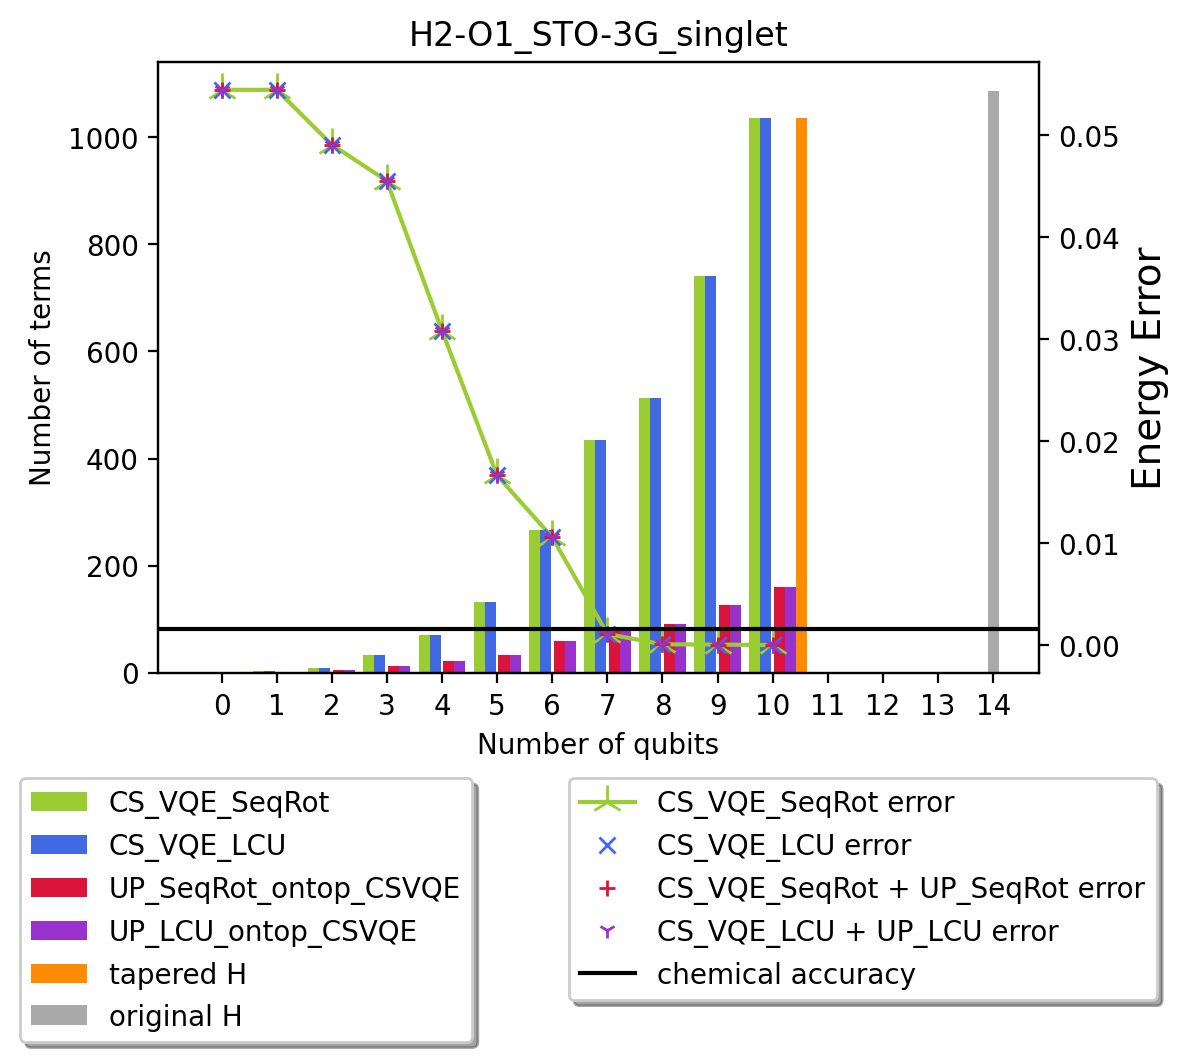

In [20]:
plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
                       tapered_H_size_qubits, 
                       myriad_CS_VQE_LCU_results,
                       myriad_CS_VQE_SeqRot_results,
                       myriad_UP_LCU_on_CSVQE_LCU,
                       myriad_UP_SeqRot_on_CSVQE_SeqRot,
                        'H2-O1_STO-3G_singlet',
                       dpi=200)

# SeqRot circuits

In [21]:
H_reduced = myriad_UP_LCU_on_CSVQE_LCU['H2-O1_STO-3G_singlet']['H2-O1_STO-3G_singlet'][7]

In [22]:
len(list(H_reduced['AC_sets'].values()))

82

# Ansatz Circuit

In [23]:
from openfermion.linalg import qubit_operator_sparse
from scipy.linalg import eigh
from functools import reduce

openFermion_H = reduce(lambda x,y: x+y, list(H_reduced['AC_sets'].values()))
openFermion_H = reduce(lambda x,y: x+y, openFermion_H)
openFermion_H

H_matrix = qubit_operator_sparse(openFermion_H)
eig_values, eig_vectors = eigh(H_matrix.todense()) # NOT sparse!

idx = eig_values.argsort()  
eigenValues = eig_values[idx]
eigenVectors = eig_vectors[:,idx]

ground_state = np.around(eigenVectors[:,0].real, 10)

In [24]:
norm = ground_state/np.dot(ground_state,ground_state)
sum(np.abs(norm)**2)

1.0000000000710565

In [25]:
from quchem.Qcircuit.Circuit_functions_to_create_arb_state import intialization_circuit
ansatz_circuit, global_phase = intialization_circuit(ground_state,
                             0,
                             check_circuit=True)
ansatz_circuit

ValueError: circuit not preparing correct state!

In [ ]:
global_phase

In [ ]:
# print(global_phase)
# np.allclose(global_phase*ansatz_circuit.final_state_vector(), ground_state)

In [ ]:
# from quchem.Qcircuit.Circuit_functions_to_create_arb_state import prepare_arb_state_IBM_to_cirq
# ansatz_circuit = prepare_arb_state_IBM_to_cirq(ground_state)
# ansatz_circuit

In [ ]:
from quchem.Qcircuit.Circuit_functions_to_create_arb_state import prepare_arb_state_cirq_matrix_gate
ansatz_circuit = prepare_arb_state_cirq_matrix_gate(ground_state)
ansatz_circuit

In [ ]:
np.allclose(ansatz_circuit.final_state_vector(), ground_state)

In [ ]:
from quchem.Unitary_Partitioning.Seq_Rot_circuit_functions_AUTO import Auto_Seq_Rot_VQE_Experiment_UP_manual_reduced_circuit_lin_alg

manual_reduction_lin_alg_SeqRot_exp = Auto_Seq_Rot_VQE_Experiment_UP_manual_reduced_circuit_lin_alg(
H_reduced['AC_sets'],
ansatz_circuit)

E_SeqRot_manual_circuit_reduction = manual_reduction_lin_alg_SeqRot_exp.Calc_Energy(check_circuit=True,
                                                                                    check_reduction_lin_alg=True, 
                                                                                    maximise_CNOT_reduction=True)
E_SeqRot_manual_circuit_reduction

In [ ]:
H_reduced['E']

In [ ]:
min(eigenValues)

In [ ]:
len(H_reduced['AC_sets'].items())

In [ ]:
len(largest_AC_set)

In [28]:
## LARGEST AC set
key_larg, largest_AC_set = max(H_reduced['AC_sets'].items(), key=lambda x:len(x[1])) 

In [32]:
from quchem.Unitary_Partitioning.Seq_Rot_circuit_functions_AUTO import Auto_Build_R_SeqRot_Q_circuit_manual_Reduced
N_qubits = len(ansatz_circuit.all_qubits())

full_RS_circuit, Ps, gamma_l = Auto_Build_R_SeqRot_Q_circuit_manual_Reduced(largest_AC_set,
                                                      N_qubits, 
                                                      check_reduction_lin_alg=True, 
                                                      atol=1e-8, rtol=1e-05, 
                                                      check_circuit=True, 
                                                      maximise_CNOT_reduction=True)
full_RS_circuit

┌────────┐
0: ────S^-1────────H─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@───────────────────────────────────────────────────@────────H───S───@─────────────────────────────────────────────────────────────────────────────@───@───────────────────────────────────────────────────────────────────────────────────────────────@───────────
                                                                                                                                                 │                                                   │                │                                                                             │   │                                                                                               │
1: ────@────────────────────────────────────@───────@────────────────────────────────@───S^-1───H────────────────────────────────────────────────┼───────────────────────────────────────────────────┼────────────────┼─────────────────────────────────────────────────────────────────────────────┼───X────────@────────────────────────────────@───@─────────────────────────────────────────────@───X───H───S───
       │                                    │       │                                │                                                           │                                                   │                │                                                                             │            │                                │   │                                             │
2: ────┼───S^-1────H────────────────────────┼───────┼────────────────────────────────┼───@───────────────────────────────────────────@───H───S───X───@───────────────────────────────────────────@───X────────H───────X───@────────────────────────────────@───────────@────────────────────────@───X───X^-0.5───┼────────────────────────────────┼───X────────@────────────────────────────────@───X───H───S───────
       │                                    │       │                                │   │                                           │               │                                           │                        │                                │           │                        │                │                                │            │                                │
3: ────┼────────────────────────────────────┼───────X───@────────────────────────@───X───X──────@────────────────────────────────@───X───H───────────X───@────────────────────────────────@──────X───X^-0.5───────────────X───@────────────────────────@───X───X^0.5───X───@────────────────@───X────────────────X───@────────────────────────@───X───X^-0.5───X───@────────────────────────@───X───H───S───────────
       │                                    │           │                        │              │                                │                       │                                │                                   │                        │                   │                │                        │                        │                    │                        │
4: ────┼───S^-1────H────────────────────────┼───────────X───@────────────────@───X───H───S──────X───@────────────────────────@───X───────────────────────X───@────────────────────────@───X───────────────────────────────────X───@────────────────@───X───────────────────┼────────────────┼────────────────────────X───@────────────────@───X────────────────────X───@────────────────@───X───────────────────────
       │                                    │               │                │                      │                        │                               │                        │                                           │                │                       │                │                            │                │                            │                │
5: ────X───────────────@──────────

In [33]:
from quchem.Misc_functions.Misc_functions import count_circuit_gates, Get_circuit_depth
print(count_circuit_gates(full_RS_circuit))

print('circuit depth: ', Get_circuit_depth(full_RS_circuit))

gate_count(single_q=42, CNOT=56, two_q=0)
circuit depth:  72


In [34]:
from quchem.Unitary_Partitioning.Seq_Rot_circuit_functions_AUTO import Auto_Build_R_SeqRot_Q_circuit_IBM_Reduced

IBM_full_RS_circuit, IBM_Ps, IBM_gamma_l = Auto_Build_R_SeqRot_Q_circuit_IBM_Reduced(largest_AC_set,
                                                      N_qubits, 
                                                      check_reduction_lin_alg=True, 
                                                      atol=1e-8, rtol=1e-05, 
                                                      check_circuit=True, 
                                                      maximise_CNOT_reduction=True)
IBM_full_RS_circuit

does circuit have modified Zpow: no


┌─────────┐                                                                                                                                                                                                                                                                                                                                                   ┌─────────┐
0: ────Rx(0.5π)───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@───────────────────────────────────────────────────────@───Rx(-0.5π)───@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────@───@──────────────────────────────────────────────────────────────────────────────────────────────────────────────────@───────────────────────
                                                                                                                                                                  │                                                       │               │                                                                                                                 │   │                                                                                                                  │
1: ────────────@─────────────────────────@───────────@────────────────────────────────@───────────Rx(0.5π)────────────────────────────────────────────────────────┼───────────────────────────────────────────────────────┼───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼───X────@─────────────────────────────────────────@───@───────────────────────────────────────────────────@───────────X───────────Rx(-0.5π)───
               │                         │           │                                │                                                                           │                                                       │               │                                                                                                                 │        │                                         │   │                                                   │
2: ────Rx(0.5π)┼─────────────────────────┼───────────┼────────────────────────────────┼───────────@───────────────────────────────────────────────@───Rx(-0.5π)───X───@───────────────────────────────────────────────@───X───H───────────X───@───Ry(π)────────────────────────────────────────────────@───Rz(0.75π)───Ry(π)───Rz(-0.75π)───────@───────────X───H────┼Rx(0.5π)─────────────────────────────────┼───X──────────────@────────────────────────────────@───X───────────Rx(-0.5π)───────────────
               │                         │           │                                │           │                                               │                   │                                               │                       │                                                        │                                        │                    │                                         │                  │                                │
3: ────────────┼─────────────────────────┼───────────X───@────────────────────────@───X───────────X──────────@────────────────────────────────@───X───H───────────────X───@────────────────────────────────@──────────X───H───Rx(0.5π)────────X───@────────────────────────────@───Ry(0.5π)───Rz(2π)───X───Rz(1.5π)────@────────────────────@───X────────────────────X────────────@────────────────────────@───X───H───Rx(0.5π)───X───@────────────────────────@───X───Rx(-0.5π)───────────────────────────
               │                         │               │                        │                          │                                │                           │                                │                                      │                            │                   

In [35]:
print(count_circuit_gates(IBM_full_RS_circuit))

gate_count(single_q=39, CNOT=55, two_q=0)


In [ ]:
import cirq
cirq.testing.assert_allclose_up_to_global_phase(IBM_full_RS_circuit.unitary(),
                                               full_RS_circuit.unitary(),
                                               atol=1e-8)


In [36]:
from quchem.Unitary_Partitioning.Seq_Rot_circuit_functions_AUTO import Auto_Build_R_SeqRot_Q_circuit_tiket_Reduced

full_RS_circuit_tiket, Ps, gamma_l = Auto_Build_R_SeqRot_Q_circuit_tiket_Reduced(
                                                      largest_AC_set,
                                                      N_qubits, 
                                                      check_reduction_lin_alg=True, 
                                                      atol=1e-8, rtol=1e-05, 
                                                      check_circuit=True, 
                                                      maximise_CNOT_reduction=True)
full_RS_circuit_tiket

0: ─────────────X^0.5───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────X───Z^0.019───X^-0.5───X───────────────────────────────────────────────────────X───Z^0.023───X───────────────────────────────────────────X───Z^0.038───X───────────────────────────────────────X───Z^0.025───X───────────────────────X───Z^(0)───X───────────────────────────────────────────────────────
                                                                                                                                                                                                                    │                      │                                                       │             │                                           │             │                                       │             │                       │           │
1: ─────────────S────────X────────S───────X───────Z^0.038───X───────────────────────────────────X───Z^-0.02───X^0.5───X─────────────────────────────────────────────────────────────────────────────────────────────┼──────────────────────┼───────────────────────────────────────────────────────┼─────────────┼───────────────────────────────────────────┼─────────────┼───────────────────────────────────X───@─────────────@───X───────────────X───@───────────@───X^0.5───X───────────────────────────────────────────
                                          │                 │                                   │                     │                                                                                             │                      │                                                       │             │                                           │             │                                   │                     │               │                           │
2: ─────────────X^-0.5────────────────────┼─────────────────┼───────────────────────────────────┼─────────────────────┼───────────────────────────────X───Z^0.003───X^0.5───X───────────────────────────────────X───@──────────────────────@───X───S───────X^0.5───S───────────────────────────X───@─────────────@───X───────────────────────────────────X───@─────────────@───X^0.5───X───S───────────────────┼─────────────────────┼───────────X───@───────────────────────────@───X^0.5───X───────────────────────────────
                                          │                 │                                   │                     │                               │                     │                                   │                              │                                               │                     │                                   │                             │                       │                     │           │                                           │
3: ─────────────Z─────────────────────────┼─────────────────┼───────────────────────────────X───@─────────────────────@───X───────────────────────X───@─────────────────────@───X───S───X^0.5───S───────────X───@──────────────────────────────@───X^0.5───X───────S───────────────────────X───@─────────────────────@───X^0.5───X───S───X^0.5───S───X───@─────────────────────────────@───X───────────────X───@─────────────────────@───X^0.5───@───────────────────────────────────────────@───X^0.5───X───S───X^0.5───S───
                                          │                 │                               │                             │                       │                             │                           │                                              │                               │                                     │                   │                                     │               │                                                                                             │
4: ─────────────Z────────X^-0.5───────────┼─────────────────┼───────

In [37]:
print(count_circuit_gates(full_RS_circuit_tiket))

unknown gate: (-1+1.2246467991473532e-16j)
gate_count(single_q=58, CNOT=54, two_q=0)


In [ ]:
# from qiskit.extensions import UnitaryGate
# from qiskit import QuantumCircuit, Aer, execute
# from qiskit.compiler import transpile
# from cirq.contrib.qasm_import import circuit_from_qasm
# from cirq.testing import assert_allclose_up_to_global_phase

# UnitaryMatrix = full_RS_circuit.unitary()
# opt_lvl=2
# allowed_gates= ['id', 'rz', 'ry', 'rx', 'cx' ,'s', 'h', 'y','z', 'x']

# qiskit_matrix_gate = UnitaryGate(UnitaryMatrix)

# n_qubits = int(np.log2(UnitaryMatrix.shape[0]))

# qiskit_c = QuantumCircuit(n_qubits)
# qiskit_c.unitary(qiskit_matrix_gate, list(range(0,n_qubits)), label='initialize')

# compiled_circuit = transpile(qiskit_c,
#                             optimization_level=opt_lvl, 
#                             basis_gates=allowed_gates, 
#                             approximation_degree=1)

# ibm_qasm = compiled_circuit.qasm()

# cirq_circuit = circuit_from_qasm(ibm_qasm)
# cirq_circuit

^^^ NO STRUCTURE... THEREFORE MASSIVE CIRCUIT AS IT PARMS THE 2^N x 2^N UNITARY:

gate_count(single_q=56920, CNOT=18600, two_q=0)

In [ ]:
# print(count_circuit_gates(cirq_circuit))
print('gate_count(single_q=56920, CNOT=18600, two_q=0)')